In [167]:
#packages
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [168]:
data = pd.read_csv('whitelist_filled_latest.csv')

In [169]:
data.head()

Unnamed: 0  decorated_indicator  manage_shop_indicator  \
0           0                  1.0                    0.0   
1           1                  1.0                    0.0   
2           2                  1.0                    0.0   
3           3                  1.0                    0.0   
4           4                  1.0                    0.0   

   officialstore_indicator  preferred_shop_indicator  crossborder_indicator  \
0                      1.0                       0.0                    1.0   
1                      1.0                       0.0                    1.0   
2                      1.0                       0.0                    1.0   
3                      1.0                       0.0                    1.0   
4                      1.0                       0.0                    1.0   

   shop_category  new_seller_flag  seller_centre_login_L30D  shop_sku_number  \
0            5.0              0.0                      28.0            907.0   
1            5.0              0.0                      28.0            907.0   
2            5.0              0.0                      28.0            907.0   
3            5.0              0.0                      28.0            907.0   
4            5.0              0.0                      28.0            907.0   

   ...  shop_L180D_order  weighted_shop_rating  performance_date  \
0  ...          156119.0                   5.0              13.0   
1  ...          156119.0                   5.0               1.0   
2  ...          156119.0                   5.0              14.0   
3  ...          156119.0                   5.0              11.0   
4  ...          156119.0                   5.0               6.0   

   masked_item_impression  masked_order  masked_shop_page_view  \
0            2.371076e+10    21024576.0                    0.0   
1            2.560704e+10     4657463.0                  400.0   
2            2.126114e+10    12008989.0                    0.0   
3            1.736307e+10      405224.0                   16.0   
4            2.038527e+10     4657463.0                   16.0   

   masked_shop_click_from_search  masked_campaign_tab_click  \
0                          225.0                       11.0   
1                          361.0                       11.0   
2                          289.0                       11.0   
3                          484.0                       11.0   
4                          400.0                       11.0   

   masked_other_tab_click  shop_index  
0                 10299.0   946403415  
1                  9133.0   946403415  
2                 12598.0   946403415  
3                  8671.0   946403415  
4                  9254.0   946403415  

[5 rows x 21 columns]

In [170]:
data = data.drop(columns=['decorated_indicator','Unnamed: 0'])

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7504 entries, 0 to 7503
Data columns (total 19 columns):
manage_shop_indicator            7504 non-null float64
officialstore_indicator          7504 non-null float64
preferred_shop_indicator         7504 non-null float64
crossborder_indicator            7504 non-null float64
shop_category                    7504 non-null float64
new_seller_flag                  7504 non-null float64
seller_centre_login_L30D         7504 non-null float64
shop_sku_number                  7504 non-null float64
shop_follower_number             7504 non-null float64
shop_L180D_order                 7504 non-null float64
weighted_shop_rating             7504 non-null float64
performance_date                 7504 non-null float64
masked_item_impression           7504 non-null float64
masked_order                     7504 non-null float64
masked_shop_page_view            7504 non-null float64
masked_shop_click_from_search    7504 non-null float64
masked_campai

In [172]:
data.head()

manage_shop_indicator  officialstore_indicator  preferred_shop_indicator  \
0                    0.0                      1.0                       0.0   
1                    0.0                      1.0                       0.0   
2                    0.0                      1.0                       0.0   
3                    0.0                      1.0                       0.0   
4                    0.0                      1.0                       0.0   

   crossborder_indicator  shop_category  new_seller_flag  \
0                    1.0            5.0              0.0   
1                    1.0            5.0              0.0   
2                    1.0            5.0              0.0   
3                    1.0            5.0              0.0   
4                    1.0            5.0              0.0   

   seller_centre_login_L30D  shop_sku_number  shop_follower_number  \
0                      28.0            907.0               82005.0   
1                      28.0            907.0               82005.0   
2                      28.0            907.0               82005.0   
3                      28.0            907.0               82005.0   
4                      28.0            907.0               82005.0   

   shop_L180D_order  weighted_shop_rating  performance_date  \
0          156119.0                   5.0              13.0   
1          156119.0                   5.0               1.0   
2          156119.0                   5.0              14.0   
3          156119.0                   5.0              11.0   
4          156119.0                   5.0               6.0   

   masked_item_impression  masked_order  masked_shop_page_view  \
0            2.371076e+10    21024576.0                    0.0   
1            2.560704e+10     4657463.0                  400.0   
2            2.126114e+10    12008989.0                    0.0   
3            1.736307e+10      405224.0                   16.0   
4            2.038527e+10     4657463.0                   16.0   

   masked_shop_click_from_search  masked_campaign_tab_click  \
0                          225.0                       11.0   
1                          361.0                       11.0   
2                          289.0                       11.0   
3                          484.0                       11.0   
4                          400.0                       11.0   

   masked_other_tab_click  shop_index  
0                 10299.0   946403415  
1                  9133.0   946403415  
2                 12598.0   946403415  
3                  8671.0   946403415  
4                  9254.0   946403415

In [173]:
#data.loc[data['shop_index']==439065]

In [174]:
#data = data.groupby('shop_index').mean()
X = data.groupby('shop_index').mean()

In [175]:
#feature scaling
#cols = data.columns
#from sklearn.preprocessing import MinMaxScaler

#ms = MinMaxScaler()

#X = ms.fit_transform(data)

#X = pd.DataFrame(X, columns=[cols])

#X.head()

<h2> K Means </h2>

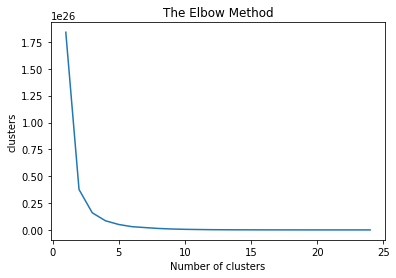

In [176]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
plt.plot(range(1, 25), clusters)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clusters')
plt.show()


In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [178]:
kmeans.inertia_

5.066206768417619e+24

In [179]:
from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.9439096363527931

<h2>AgglomerativeClustering</h2>

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

Average linkage minimizes the average of the distances between all observations of pairs of clusters.

Single linkage minimizes the distance between the closest observations of pairs of clusters.

/Users/miya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



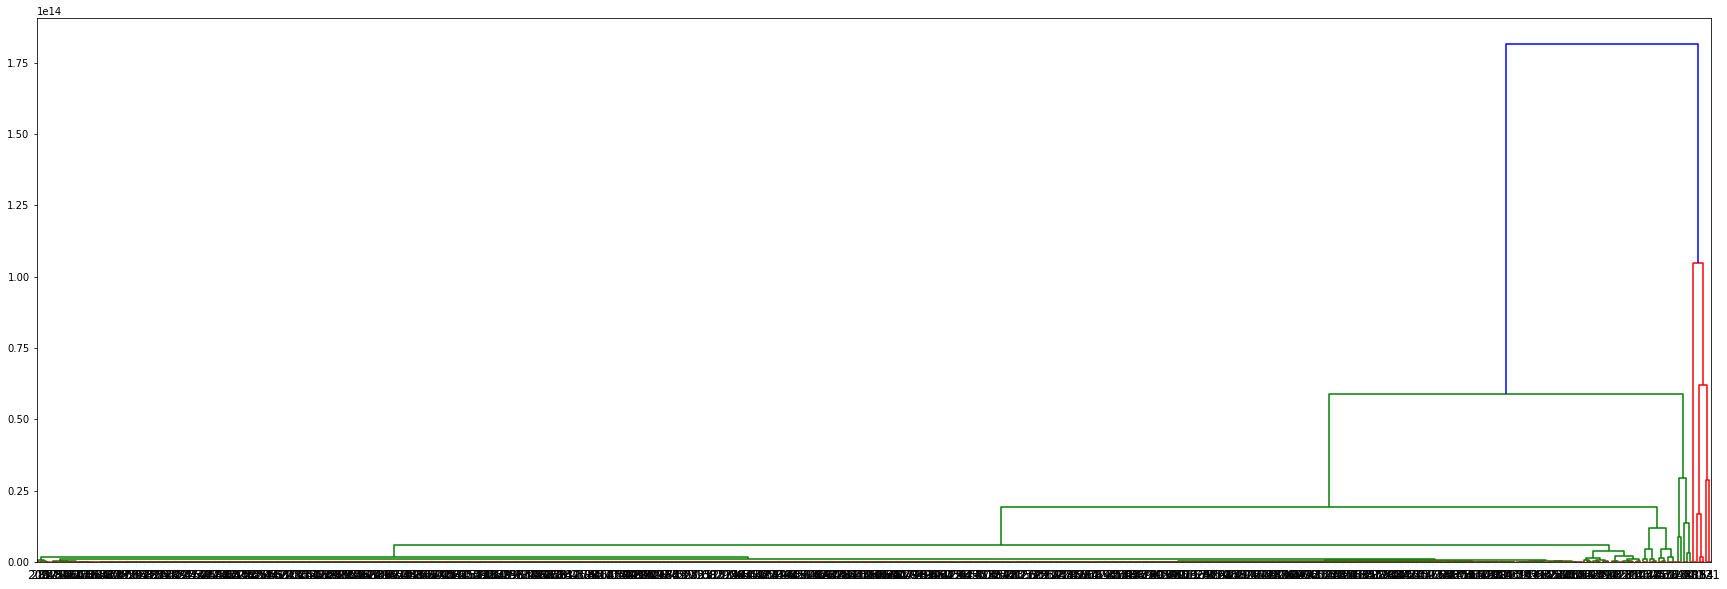

In [180]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(30, 10))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12)
plt.axhline(y=0.2, color='r', linestyle='--')

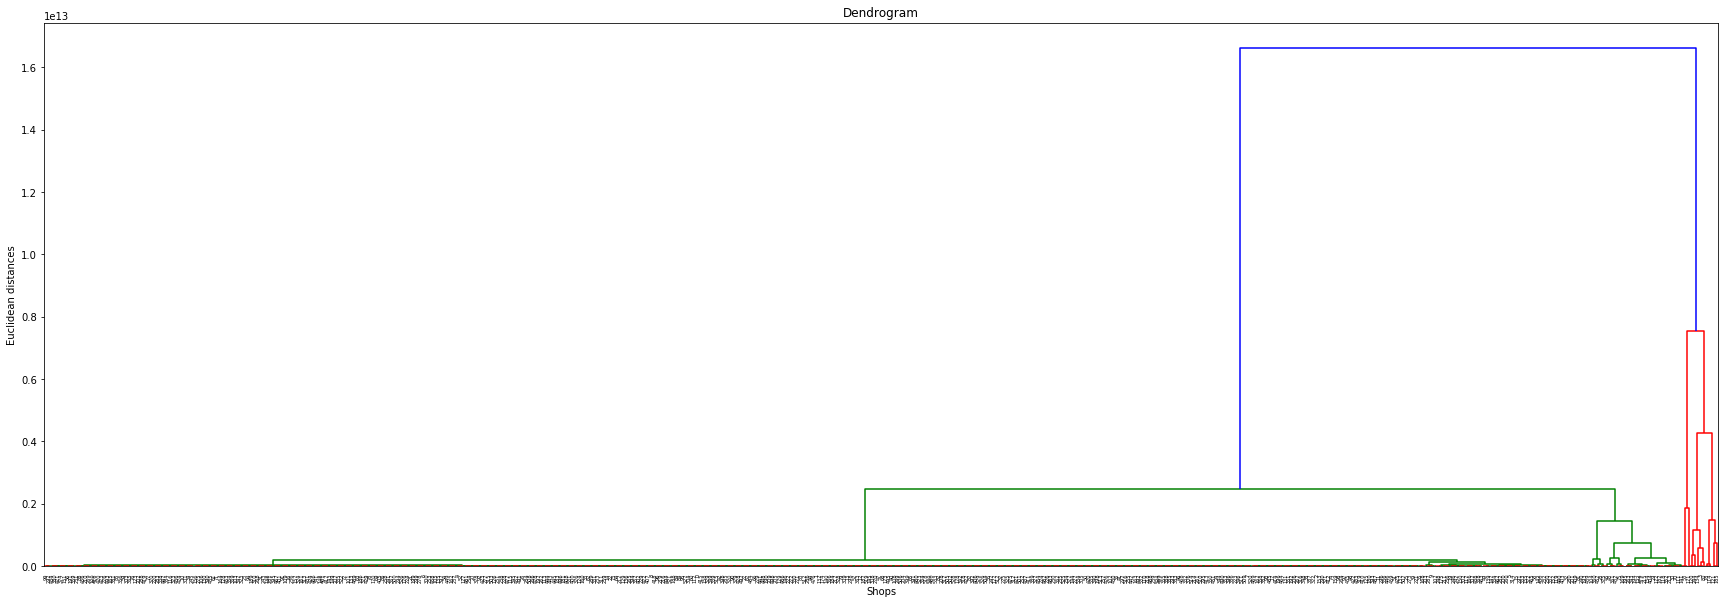

In [181]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(30, 10))
plt.axhline(y=0.2, color='r', linestyle='--')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Shops')
plt.ylabel('Euclidean distances')
plt.show()

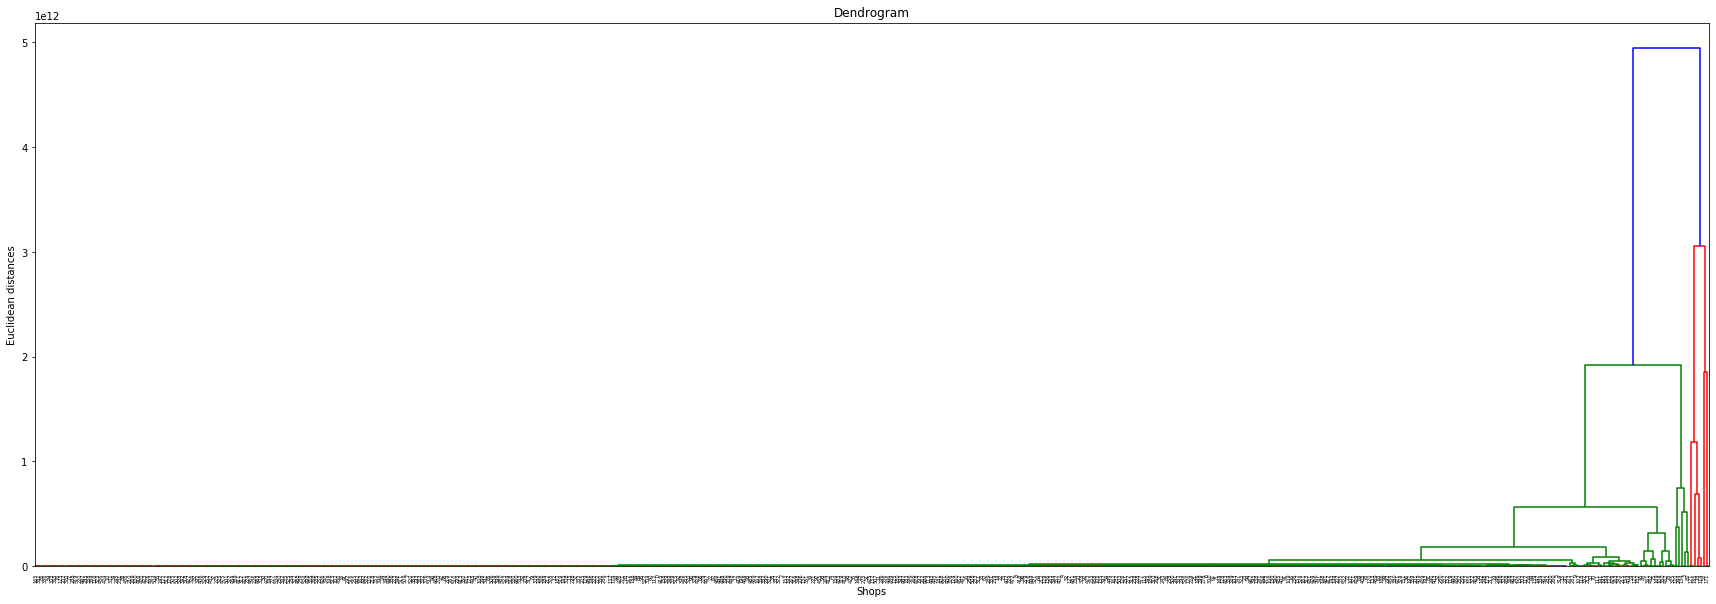

In [182]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(30, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Shops')
plt.ylabel('Euclidean distances')
plt.show()

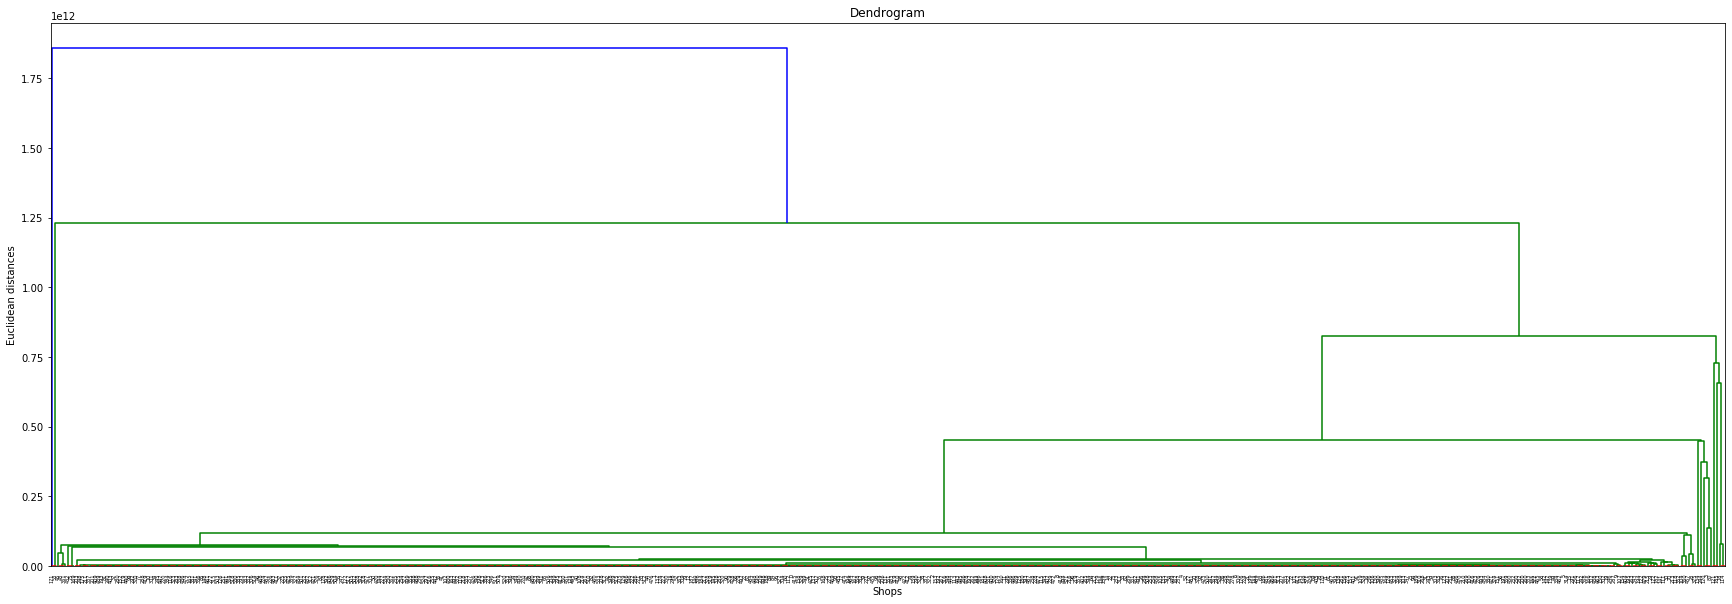

In [183]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(30, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Shops')
plt.ylabel('Euclidean distances')
plt.show()

In [184]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

cluster_complete = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')  
cluster_complete_labels = cluster_complete.fit_predict(X)

metrics.silhouette_score(X, cluster_complete_labels, metric='euclidean')


0.9532173224629052

In [185]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
cluster_ward = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_ward_labels = cluster_ward.fit_predict(X)


metrics.silhouette_score(X, cluster_ward_labels, metric='euclidean')

0.9284731364608269

In [186]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster_single_labels = cluster_ward.fit_predict(X)


metrics.silhouette_score(X, cluster_single_labels, metric='euclidean')

0.9284731364608269

In [187]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
cluster_averagelink = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

cluster_averagelink = cluster_average.fit_predict(X)
#cluster
from sklearn import metrics

metrics.silhouette_score(X, cluster_averagelink, metric='euclidean')

0.9644830137773986

<h2>meanshift </h2>

In [188]:
#meanshift
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics



bandwidth = estimate_bandwidth(X.values, quantile=0.4, n_samples=1000)

shop_meanshift = MeanShift(bandwidth=bandwidth)
shop_meanshift.fit(X.values)

meanshift_labels = shop_meanshift.labels_
labels_unique = np.unique(meanshift_labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: ' + str(n_clusters_))
print(metrics.silhouette_score(X.values, meanshift_labels, metric='euclidean'))

Estimated number of clusters: 15
0.9344869132769383


In [189]:
import copy
X2 = copy.deepcopy(X)
X2.head()

manage_shop_indicator  officialstore_indicator  \
shop_index                                                   
439065                        0.0                      0.0   
826470                        0.0                      0.0   
993555                        0.0                      0.0   
1555020                       1.0                      1.0   
3343725                       1.0                      0.0   

            preferred_shop_indicator  crossborder_indicator  shop_category  \
shop_index                                                                   
439065                           1.0                    0.0            4.0   
826470                           0.0                    0.0            6.0   
993555                           1.0                    0.0            6.0   
1555020                          0.0                    0.0           20.0   
3343725                          1.0                    0.0            0.0   

            new_seller_flag  seller_centre_login_L30D  shop_sku_number  \
shop_index                                                               
439065                  0.0                      29.0            676.0   
826470                  0.0                      16.0           1072.0   
993555                  0.0                      24.0           1776.0   
1555020                 0.0                      30.0           4240.0   
3343725                 0.0                      30.0           1028.0   

            shop_follower_number  shop_L180D_order  weighted_shop_rating  \
shop_index                                                                 
439065                    4086.0            5332.0                   4.0   
826470                    2859.0            3746.0                   3.0   
993555                   17355.0            8101.0                   4.0   
1555020                1474614.0          591385.0                   4.0   
3343725                  25302.0           28823.0                   4.0   

            performance_date  masked_item_impression  masked_order  \
shop_index                                                           
439065                   7.5            3.120598e+07  1.826543e+04   
826470                   7.5            8.861953e+06  5.964286e+01   
993555                   7.5            6.135533e+07  2.110857e+03   
1555020                  7.5            1.997699e+12  1.268384e+09   
3343725                  7.5            4.417539e+08  4.699229e+04   

            masked_shop_page_view  masked_shop_click_from_search  \
shop_index                                                         
439065                 802.071429                   6.002256e+01   
826470                 123.642857                   2.723308e+01   
993555                 999.500000                   4.486842e+01   
1555020                 41.071429                   3.944120e+06   
3343725                 70.000000                   2.154887e+02   

            masked_campaign_tab_click  masked_other_tab_click  
shop_index                                                     
439065                      11.000000              109.071429  
826470                      11.000000               44.808271  
993555                      11.000000              180.571429  
1555020                   6494.571429            48845.357143  
3343725                     11.000000              457.928571

In [190]:
X2.loc[:,'kmeans.labels'] = kmeans.labels_
X2.loc[:,'agglomerative.average.labels'] = cluster_averagelink
X2.loc[:,'agglomerative.complete.labels']= cluster_complete_labels
X2.loc[:,'meanshift.labels'] = meanshift_labels

In [191]:
X2.head()

manage_shop_indicator  officialstore_indicator  \
shop_index                                                   
439065                        0.0                      0.0   
826470                        0.0                      0.0   
993555                        0.0                      0.0   
1555020                       1.0                      1.0   
3343725                       1.0                      0.0   

            preferred_shop_indicator  crossborder_indicator  shop_category  \
shop_index                                                                   
439065                           1.0                    0.0            4.0   
826470                           0.0                    0.0            6.0   
993555                           1.0                    0.0            6.0   
1555020                          0.0                    0.0           20.0   
3343725                          1.0                    0.0            0.0   

            new_seller_flag  seller_centre_login_L30D  shop_sku_number  \
shop_index                                                               
439065                  0.0                      29.0            676.0   
826470                  0.0                      16.0           1072.0   
993555                  0.0                      24.0           1776.0   
1555020                 0.0                      30.0           4240.0   
3343725                 0.0                      30.0           1028.0   

            shop_follower_number  shop_L180D_order  ...  \
shop_index                                          ...   
439065                    4086.0            5332.0  ...   
826470                    2859.0            3746.0  ...   
993555                   17355.0            8101.0  ...   
1555020                1474614.0          591385.0  ...   
3343725                  25302.0           28823.0  ...   

            masked_item_impression  masked_order  masked_shop_page_view  \
shop_index                                                                
439065                3.120598e+07  1.826543e+04             802.071429   
826470                8.861953e+06  5.964286e+01             123.642857   
993555                6.135533e+07  2.110857e+03             999.500000   
1555020               1.997699e+12  1.268384e+09              41.071429   
3343725               4.417539e+08  4.699229e+04              70.000000   

            masked_shop_click_from_search  masked_campaign_tab_click  \
shop_index                                                             
439065                       6.002256e+01                  11.000000   
826470                       2.723308e+01                  11.000000   
993555                       4.486842e+01                  11.000000   
1555020                      3.944120e+06                6494.571429   
3343725                      2.154887e+02                  11.000000   

            masked_other_tab_click  kmeans.labels  \
shop_index                                          
439065                  109.071429              0   
826470                   44.808271              0   
993555                  180.571429              0   
1555020               48845.357143              1   
3343725                 457.928571              0   

            agglomerative.average.labels  agglomerative.complete.labels  \
shop_index                                                                
439065                                 3                              0   
826470                                 3                              0   
993555                                 3                              0   
1555020                                1                              4   
3343725                                3                              0   

            meanshift.labels  
shop_index                    
439065                     0  
826470                     0  
993555                     0  
1555020      

<h2> Visualizations </h2>

In [195]:
import plotly as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x= X2['shop_follower_number'],
    y= X2['shop_L180D_order'],
    z= X2['shop_sku_number'],
    mode='markers',
     marker=dict(
        color = X2['agglomerative.average.labels'], 
        size= 10,
        line=dict(
            color= X2['agglomerative.average.labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'shop_follower_number'),
            yaxis = dict(title  = 'shop_L180D_order'),
            zaxis = dict(title  = 'shop_sku_number')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<h2> Export CSV </h2>

In [196]:
X2.to_csv(r'labelled_whitelist_shop.csv', index = False)